## Pivot Table

A pivot table is a powerful tool in data analysis that allows you to summarize and aggregate large datasets into a more manageable form. Python offers many libraries for working with data, and each of these libraries provides a different way of creating a pivot table.

Key Points:
* For absolute value - Go for bar chart
* For percentage or proportional value - Go for pie chart 

They both are used for categorical data

In [3]:
import pandas as pd   #import pandas
import matplotlib.pyplot as plt 
bike = pd.read_csv("bikeshare/day.csv")  #read file

#### Using Some Methods to get Information about data

In [4]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
bike.index

RangeIndex(start=0, stop=731, step=1)

In [9]:
bike.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

### Date Time

In [11]:
bike["dteday"] = pd.to_datetime(bike["dteday"])   #convert date data into datetime

In [13]:
bike["dteday"][0]  #access first value of datetime

Timestamp('2011-01-01 00:00:00')

In [15]:
bike["dteday"].dt.day  #tells about every day

0       1
1       2
2       3
3       4
4       5
       ..
726    27
727    28
728    29
729    30
730    31
Name: dteday, Length: 731, dtype: int32

In [17]:
bike["dteday"].dt.strftime("%A %B") #tells about day and month 

0       Saturday January
1         Sunday January
2         Monday January
3        Tuesday January
4      Wednesday January
             ...        
726    Thursday December
727      Friday December
728    Saturday December
729      Sunday December
730      Monday December
Name: dteday, Length: 731, dtype: object

In [ ]:
# bike[bike["weekday"] == 0]    #answers= data frame without ellipse (....)

---

Note: Here by using pivot table we extract mean of both casual and registered users with working days individually (for both Sat and Sun)

Note: #aggfunc mean is bydefault in pivot table

In [6]:
w_mean = pd.pivot_table(bike, index="workingday", values=["registered", "casual"], aggfunc = "mean") 
w_mean #here w_mean is a "data frame"

,casual,registered
workingday,,
0,1371.134199,2959.034632
1,606.570000,3978.250000


Mean of Sunday Only for casual and registered users with working days without using Pivot Table

In [14]:
bike[bike["workingday"] == 0][["registered", "casual"]].mean()

registered    2959.034632
casual        1371.134199
dtype: float64

Data of Casual Users only From Pivot Table 

In [17]:
w_mean["casual"]

workingday
0    1371.134199
1     606.570000
Name: casual, dtype: float64

Data of Registered Users only From Pivot Table 

In [20]:
w_mean["registered"]

workingday
0    2959.034632
1    3978.250000
Name: registered, dtype: float64

### Plot bar using Pandas for series data

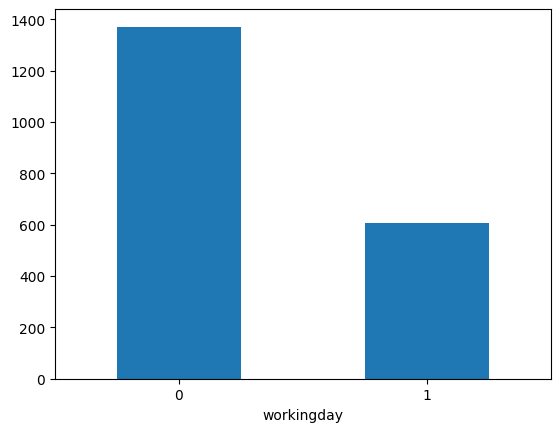

In [7]:
w_mean["casual"].plot.bar()
plt.xticks(rotation=0)
plt.show()

#### Replace 0 and 1 with Working and NonWorking days in x-axis

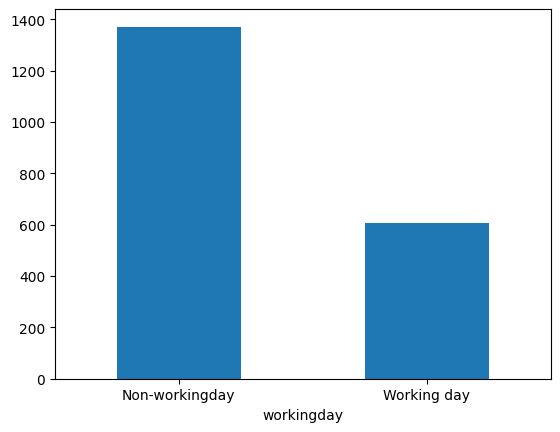

In [8]:
w_mean["casual"].plot.bar()
plt.xticks(ticks=[0,1], labels=["Non-workingday", "Working day"], rotation=0)
plt.show()